In [ ]:
import torch
from torch import nn, optim # Sets of preset layers and optimizers
import torch.nn.functional as F # Sets of functions such as ReLU
import torchvision as tv
# Step 1: Let's import some libraries!
import torch.nn as nn
import torchvision
import numpy as np
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split, Subset
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import random
from tqdm import tqdm
from torchvision import datasets, transforms # Popular datasets, architectures and common image transformations for computer vision
from sklearn.metrics import confusion_matrix
import itertools




In [ ]:
def load_mnist(batch_size=32, train=True):

    '''
    Using the dataset and dataloader classes you should be able to make an MNIST set and loader
    the loader should use the 'batch_size' argument and the dataset should use'train'

    Also, the 'ToTensor' transform is given, you should set the transform of the dataset to just this
    '''
    to_tensor_transform = torchvision.transforms.ToTensor()
    dataset = torchvision.datasets.MNIST(root = "./data", train = train,transform = to_tensor_transform,download = True )
    dataloader = DataLoader(dataset,batch_size = batch_size, shuffle = True )

    return dataset, dataloader

In [ ]:

def plot_image_and_label(image, raw_output_from_model):

    '''
    Takes in an image and label and shows them using matplotlib
    this is used to visualize the data and also the outputs of our network
    '''

    plt.imshow(image)
    if type(raw_output_from_model) is not int:
        _,predicted = torch.max(raw_output_from_model,1)
#         Takes 1 highest number from the output
        plt.title("Best label = " + str(predicted.item()) + ", with Score: " + str(round(raw_output_from_model[0][predicted].item() * 100,2)))
    else:
        plt.title("Label = " + str(raw_output_from_model))
    plt.show()
    return

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([1, 28, 28]) ex_image.shape


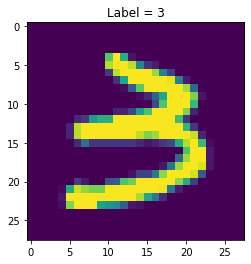

In [ ]:
# This will just test whether your dataset and loader work
# They might still have issues, but if an example image shows here you're on the right track!
train_data,train_dataloader = load_mnist(batch_size = 64, train = True)
to_tensor_transform = torchvision.transforms.ToTensor()
validate_data = datasets.MNIST(root= "./data", train=True,
                download=True, transform= to_tensor_transform)
ex_image, ex_label = train_data[random.randint(0,1000)]
print(ex_image.shape,'ex_image.shape')
plot_image_and_label(ex_image.reshape(28,28), ex_label)

In [ ]:
class MyMLP(nn.Module):
    def __init__(self,input_size, output_size):
        super().__init__()
#         self.conv1 = nn.conv2d(in_channels = 1, out_channels = 3, stride = 1, padding =)
        self.input_size = input_size
        self.lin1 = nn.Linear(input_size,256)
        self.lin2 = nn.Linear(256,128)
        self.lin3 = nn.Linear(128,output_size)
        self.relu = nn.ReLU()

    def forward(self,x):
        x = x.view(-1, self.input_size)
        out = self.lin1(x)
        out = self.relu(out)
        out = self.lin2(out)
        out = self.relu(out)
        out = self.lin3(out)
        out = self.relu(out)
        return out

torch.Size([1, 28, 28]) eximage.shape


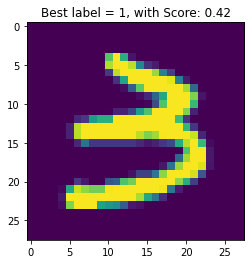

In [ ]:
# Shows the prediction of the model without training
# Not very good huh? (though theres a small chance it is lol)

test_model = MyMLP(784, 2)
test_output = test_model(ex_image.flatten()) # Notice how we flatten the 2d image into 1d to use the MLP
print(ex_image.shape,"eximage.shape")
plot_image_and_label(ex_image.reshape(28,28), test_output)

In [ ]:
bits = []
def generateAllBinaryStrings(n, arr, i,num):
    if i == n:
        key = ''.join([str(i) for i in arr])
        bits.append(key)
        num += 1
        return

    # First assign "0" at ith position
    # and try for all other permutations
    # for remaining positions
    arr[i] = 0
    generateAllBinaryStrings(n, arr, i + 1,num+1)

    # And then assign "1" at ith position
    # and try for all other permutations
    # for remaining positions
    arr[i] = 1
    generateAllBinaryStrings(n, arr, i + 1,num+1)
num = 0
generateAllBinaryStrings(4,[0]*4 , 0,num)


In [ ]:
print(bits)
mapping = {}
curr_index = 0
invMapping = {}
for index,bit in enumerate(bits):
    mapping[index] = bit
    invMapping[bit] = index
print(mapping)
# Unbalanced : ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
# {0: '1111', 1: '0001', 2: '0010', 3: '0011', 4: '0100', 5: '0101', 6: '0110', 7: '0111', 8: '1000', 9: '1001'}
# Balanced :

['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
{0: '0000', 1: '0001', 2: '0010', 3: '0011', 4: '0100', 5: '0101', 6: '0110', 7: '0111', 8: '1000', 9: '1001', 10: '1010', 11: '1011', 12: '1100', 13: '1101', 14: '1110', 15: '1111'}


In [ ]:
#  Group similar numbers together and test it out
balancedMap = {0: '0000',1 :'0001',2 : '0011', 3:'0101', 4:'0111',5:'1000',6:'1010',7:'1100',8:'1110', 9:'1111'}
invBalancedMap = {'0000' : 0,'0001': 1,'0011' : 2, '0101' : 3, '0111': 4, '1000' :5,'1010': 6,'1100' :7,'1110' : 8, '1111' :9,'0110':10,'0010':11, '0100':12,'1001':13, '1101':14,'1011':15  }

In [ ]:
"""def balanced_training(modelname,model, loss_function, optimizer, train_dataloader, n_epochs, update_interval):

    '''
    Updates the parameters of the given model using the optimizer of choice to
    reduce the given loss_function

    This will iterate over the dataloader 'n_epochs' times training on each batch of images

    To get the gradient (which is stored internally in the model) use .backward() from the loss tensor
    and to apply it use .step() on the optimizer

    In between steps you need to zero the gradient so it can be recalculated -- use .zero_grad for this
    '''

    losses = []
    part_loss = []
    for n in range(n_epochs):
        for i, (image, label) in enumerate(tqdm(iter(train_dataloader))):

            # TODO Complete the training loop using the instructions above
            # Hint: the above code essentially does one training step

            ##############################################################
            optimizer.zero_grad()
            my_output = model(image)
            if modelname == 'model1':
                new_label = torch.Tensor([int(balancedMap[int(l)][0]) for l in label]).long()
            elif modelname == 'model2':
                new_label = torch.Tensor([int(balancedMap[int(l)][1]) for l in label]).long()
            elif modelname == 'model3':
                new_label = torch.Tensor([int(balancedMap[int(l)][2]) for l in label]).long()
            elif modelname == 'model4':
                new_label = torch.Tensor([int(balancedMap[int(l)][3]) for l in label]).long()
            elif modelname == 'model':
                new_label = label
            loss = loss_function(my_output,new_label)
            loss.backward()
            optimizer.step()
            part_loss.append(loss.item())
            ##############################################################

            if i % update_interval == 0:
                losses.append(sum(part_loss)/len(part_loss)) # This will append your losses for plotting -- please use "loss" as the name for your loss
#                 part_loss = []
    return model, losses
"""

'def balanced_training(modelname,model, loss_function, optimizer, train_dataloader, n_epochs, update_interval):\n    \n    \'\'\'\n    Updates the parameters of the given model using the optimizer of choice to\n    reduce the given loss_function\n\n    This will iterate over the dataloader \'n_epochs\' times training on each batch of images\n    \n    To get the gradient (which is stored internally in the model) use .backward() from the loss tensor\n    and to apply it use .step() on the optimizer\n\n    In between steps you need to zero the gradient so it can be recalculated -- use .zero_grad for this\n    \'\'\'\n    \n    losses = []\n    part_loss = []\n    for n in range(n_epochs):\n        for i, (image, label) in enumerate(tqdm(iter(train_dataloader))):\n\n            # TODO Complete the training loop using the instructions above\n            # Hint: the above code essentially does one training step\n\n            ##############################################################\n 

In [ ]:
def balanced_training(modelname,model, loss_function, optimizer, train_dataloader, n_epochs, update_interval):

    '''
    Updates the parameters of the given model using the optimizer of choice to
    reduce the given loss_function

    This will iterate over the dataloader 'n_epochs' times training on each batch of images

    To get the gradient (which is stored internally in the model) use .backward() from the loss tensor
    and to apply it use .step() on the optimizer

    In between steps you need to zero the gradient so it can be recalculated -- use .zero_grad for this
    '''

    losses = []
    part_loss = []
    sum_loss = 0
    n_correct = 0
    total = 0
    for n in range(n_epochs):
        for i, (image, label) in enumerate(tqdm(iter(train_dataloader))):
            optimizer.zero_grad()
            pred = model(image)
            if modelname == 'model1':
                new_label = torch.Tensor([int(balancedMap[int(l)][0]) for l in label]).long()
            elif modelname == 'model2':
                new_label = torch.Tensor([int(balancedMap[int(l)][1]) for l in label]).long()
            elif modelname == 'model3':
                new_label = torch.Tensor([int(balancedMap[int(l)][2]) for l in label]).long()
            elif modelname == 'model4':
                new_label = torch.Tensor([int(balancedMap[int(l)][3]) for l in label]).long()
            elif modelname == 'model':
                new_label = label
            loss = loss_function(pred,new_label)
            loss.backward()
            optimizer.step()
            part_loss.append(loss.item())

            if i % update_interval == 0:
                losses.append(sum(part_loss)/len(part_loss)) # This will append your losses for plotting -- please use "loss" as the name for your loss

    return model, losses
# Training accuracy is found after testing on the train dataset.

In [ ]:
"""def balanced_testing(modelname, model, loss_function, test_data):
    sum_loss = 0
    n_correct = 0
    total = 0
    for i, (image, label) in enumerate(tqdm(iter(test_data))):
        pred = model(image)
        if modelname == 'model1':
            new_label =  torch.Tensor([int(balancedMap[int(l)][0]) for l in label]).long()
        elif modelname == 'model2':
            new_label = torch.Tensor([int(balancedMap[int(l)][1]) for l in label]).long()
        elif modelname == 'model3':
            new_label = torch.Tensor([int(balancedMap[int(l)][2]) for l in label]).long()
        elif modelname == 'model4':
            new_label = torch.Tensor([int(balancedMap[int(l)][3]) for l in label]).long()
        elif modelname == 'model':
            new_label = label
        loss = loss_function(pred,new_label)
        sum_loss += loss.item()
        _, predicted = torch.max(pred,1)
        n_correct += (predicted == new_label).sum()
        total += new_label.size(0)

    test_acc = round(((n_correct / total).item() * 100), 2)
    avg_loss = round(sum_loss / len(test_data), 2)

    print("test accuracy:", test_acc)
    print("test loss:", avg_loss )

    return test_acc, avg_loss
"""

'def balanced_testing(modelname, model, loss_function, test_data):\n    sum_loss = 0\n    n_correct = 0\n    total = 0\n    for i, (image, label) in enumerate(tqdm(iter(test_data))):\n        pred = model(image)\n        if modelname == \'model1\':\n            new_label =  torch.Tensor([int(balancedMap[int(l)][0]) for l in label]).long()\n        elif modelname == \'model2\':\n            new_label = torch.Tensor([int(balancedMap[int(l)][1]) for l in label]).long()\n        elif modelname == \'model3\':\n            new_label = torch.Tensor([int(balancedMap[int(l)][2]) for l in label]).long()\n        elif modelname == \'model4\':\n            new_label = torch.Tensor([int(balancedMap[int(l)][3]) for l in label]).long()\n        elif modelname == \'model\':\n            new_label = label\n        loss = loss_function(pred,new_label)\n        sum_loss += loss.item()\n        _, predicted = torch.max(pred,1)\n        n_correct += (predicted == new_label).sum()\n        total += new_labe

In [ ]:
def balanced_testing(modelname, model, loss_function, test_data):
    sum_loss = 0
    n_correct = 0
    total = 0
    for i, (image, label) in enumerate(tqdm(iter(test_data))):
        pred = model(image)
        if modelname == 'model1':
            new_label =  torch.Tensor([int(balancedMap[int(l)][0]) for l in label]).long()
        elif modelname == 'model2':
            new_label = torch.Tensor([int(balancedMap[int(l)][1]) for l in label]).long()
        elif modelname == 'model3':
            new_label = torch.Tensor([int(balancedMap[int(l)][2]) for l in label]).long()
        elif modelname == 'model4':
            new_label = torch.Tensor([int(balancedMap[int(l)][3]) for l in label]).long()
        elif modelname == 'model':
            new_label = label
        loss = loss_function(pred,new_label)
        sum_loss += loss.item()
        _, predicted = torch.max(pred,1)
        n_correct += (predicted == new_label).sum()
        total += new_label.size(0)

    test_acc = round(((n_correct / total).item() * 100), 2)
    avg_loss = round(sum_loss / len(test_data), 2)

    print("test accuracy:", test_acc)
    print("test loss:", avg_loss )

    return test_acc, avg_loss

In [ ]:
# Plug in your model, loss function, and optimizer
# Try out different hyperparameters and different models to see how they perform

lr = 0.0009          # 0.0008/6/98.1%/0.06
batch_size = 500        # The number of images being trained on at once
update_interval = 100   # The number of batches trained on before recording loss
n_epochs = 5         # The number of times we train through the entire dataset 5 10 15

train_dataset, train_dataloader = load_mnist(batch_size=batch_size, train=True)
balanced_model1 = MyMLP(784, 2)
optimizer = torch.optim.Adam(balanced_model1.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss()

100%|██████████| 120/120 [00:07<00:00, 16.49it/s]


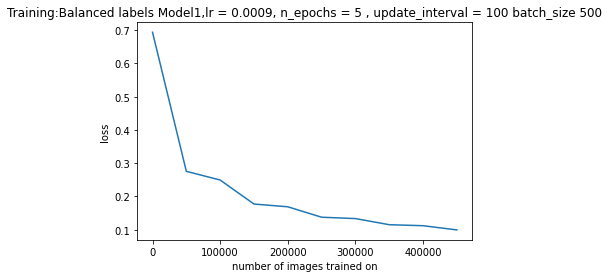

In [ ]:
#  Training Balanced Model1
balanced_trained_model1, balanced_losses1 = balanced_training('model1',balanced_model1, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval)
plt.plot(np.arange(len(balanced_losses1)) * batch_size * update_interval, balanced_losses1)
plt.title("Training:Balanced labels Model1,lr = {}, n_epochs = {} , update_interval = {} batch_size {}".format(lr,n_epochs,update_interval,batch_size))
plt.xlabel("number of images trained on")
plt.ylabel("loss")
plt.show()

In [ ]:
# Testing Balanced Model1
test_dataset, test_dataloader = load_mnist(batch_size=batch_size, train=False)
test_acc,test_avg_loss = balanced_testing('model1', balanced_trained_model1, loss_function, test_dataloader)
plt.savefig("Training, balanced labels Model1,test_acc = {},test_avg_loss = {}.png".format(test_acc,test_avg_loss))

100%|██████████| 20/20 [00:01<00:00, 18.85it/s]

test accuracy: 97.88
test loss: 0.06


<Figure size 432x288 with 0 Axes>

In [ ]:
#hyperparameter tuning model1
import math
def grid_search(model,input_shape,compression_size,test_data):
    e = math.e
    learning_rate = [0.0009,0.00095,0.001,0.0008,0.005]
    n_epochs_lst = [3,5,6]
    loss_function = nn.CrossEntropyLoss()
    accuracy = float('-inf')
    best_lr = 0
    update_interval = 100
    best_batch = 500
    best_n_epochs = 0
    for lr in learning_rate:
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        for n_epochs in n_epochs_lst :
            train_dataset, train_dataloader = load_mnist(batch_size=batch_size, train=True)
            trained_model, losses = balanced_training('model1',model, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval)
            print(lr)
            print(n_epochs)
            test_loss, test_accuracy = balanced_testing('model1', trained_model, loss_function, test_dataloader)
            if test_accuracy >= accuracy:
                best_lr = lr
                best_n_epochs = n_epochs
                accuracy = test_accuracy

    return best_lr , best_n_epochs,test_accuracy

best_lr,best_batch_size, best_n_epochs,best_acc = grid_search(balanced_model1, 784, 2, test_dataset)


100%|██████████| 120/120 [00:07<00:00, 16.00it/s]


0.0009
3


100%|██████████| 20/20 [00:01<00:00, 19.20it/s]


test accuracy: 51.39
test loss: 0.69


100%|██████████| 120/120 [00:07<00:00, 15.97it/s]


0.0009
5


100%|██████████| 20/20 [00:01<00:00, 18.84it/s]


test accuracy: 51.39
test loss: 0.69


100%|██████████| 120/120 [00:07<00:00, 15.73it/s]


0.0009
6


100%|██████████| 20/20 [00:01<00:00, 18.45it/s]


test accuracy: 51.39
test loss: 0.69


 22%|██▏       | 26/120 [00:01<00:06, 15.52it/s]


KeyboardInterrupt: ignored

In [ ]:
lr = 0.00095          # The size of the step taken when doing gradient descent 0.01 0.001 0.0001
batch_size = 500        # The number of images being trained on at once
update_interval = 100   # The number of batches trained on before recording loss
n_epochs = 3           # The number of times we train through the entire dataset 5 10 15

train_dataset, train_dataloader = load_mnist(batch_size=batch_size, train=True)
balanced_model2 = MyMLP(784, 2)
optimizer = torch.optim.Adam(balanced_model2.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss()

100%|██████████| 120/120 [00:07<00:00, 16.43it/s]


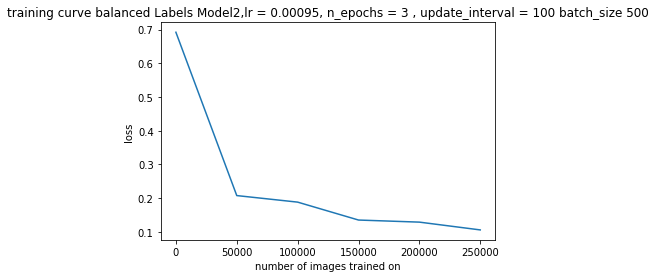

In [ ]:
#  Training Balanced Model2
balanced_trained_model2, balanced_losses2 = balanced_training('model2',balanced_model2, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval)
plt.plot(np.arange(len(balanced_losses2)) * batch_size * update_interval, balanced_losses2)
plt.title("training curve balanced Labels Model2,lr = {}, n_epochs = {} , update_interval = {} batch_size {}".format(lr,n_epochs,update_interval,batch_size))
plt.xlabel("number of images trained on")
plt.ylabel("loss")
plt.show()

In [ ]:
# Testing Balanced Model2
test_dataset, test_dataloader = load_mnist(batch_size=batch_size, train=False)
test_acc,test_loss = balanced_testing('model2', balanced_trained_model2, loss_function, test_dataloader)
plt.savefig("Balanced Model2 Training Curve test_acc {},test_loss {}.png".format(test_acc, test_loss))

100%|██████████| 20/20 [00:01<00:00, 19.04it/s]

test accuracy: 98.1
test loss: 0.06


<Figure size 432x288 with 0 Axes>

In [ ]:
#hyperparameter tuning model2
import math
def grid_search(model,input_shape,compression_size,test_data):
    e = math.e
    learning_rate = [0.0008,0.0007,0.0009,0.00095,0.001,0.00085,0.00075,0.0012,0.00092]
    n_epochs_lst = [3,5,6]
    loss_function = nn.CrossEntropyLoss()
    accuracy = float('-inf')
    best_lr = 0
    update_interval = 100
    best_batch = 500
    best_n_epochs = 0
    for lr in learning_rate:
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        for n_epochs in n_epochs_lst :
            train_dataset, train_dataloader = load_mnist(batch_size=batch_size, train=True)
            trained_model, losses = balanced_training('model2',model, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval)
            print(lr)
            print(n_epochs)
            test_loss, test_accuracy = balanced_testing('model2', trained_model, loss_function, test_dataloader)
            if test_accuracy >= accuracy:
                best_lr = lr
                best_n_epochs = n_epochs
                accuracy = test_accuracy

    return best_lr , best_n_epochs,test_accuracy

best_lr,best_batch_size, best_n_epochs,best_acc = grid_search(balanced_model2, 784, 2, test_dataset)


In [ ]:
lr = 0.001          # The size of the step taken when doing gradient descent 0.01 0.001 0.0001
batch_size = 500        # The number of images being trained on at once
update_interval = 100   # The number of batches trained on before recording loss
n_epochs = 5          # The number of times we train through the entire dataset 5 10 15

train_dataset, train_dataloader = load_mnist(batch_size=batch_size, train=True)
balanced_model3 = MyMLP(784, 2)
optimizer = torch.optim.Adam(balanced_model3.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss()


100%|██████████| 120/120 [00:07<00:00, 16.44it/s]


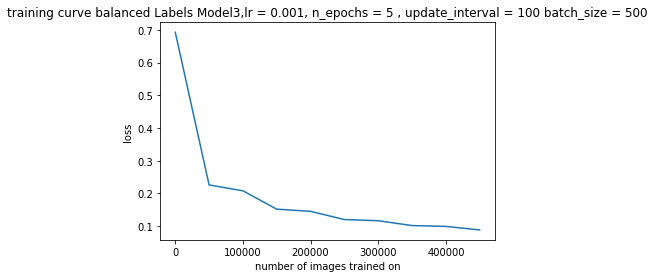

In [ ]:
#  Training Balanced Model3
balanced_trained_model3, balanced_losses3 = balanced_training('model3',balanced_model3, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval)
plt.plot(np.arange(len(balanced_losses3)) * batch_size * update_interval, balanced_losses3)
plt.title("training curve balanced Labels Model3,lr = {}, n_epochs = {} , update_interval = {} batch_size = {}".format(lr,n_epochs,update_interval,batch_size))
plt.xlabel("number of images trained on")
plt.ylabel("loss")
plt.show()


In [ ]:
# Testing Balanced Model3
test_loss,test_acc = balanced_testing('model3', balanced_trained_model3, loss_function, test_dataloader)
plt.savefig("Balanced Model3 Training Curve test_acc {} test_loss = {}.png".format(test_loss, test_acc))


100%|██████████| 20/20 [00:01<00:00, 18.12it/s]

test accuracy: 98.48
test loss: 0.04


<Figure size 432x288 with 0 Axes>

In [ ]:
#hyperparameter tuning model3
import math
def grid_search(model,input_shape,compression_size,test_data):
    e = math.e
    learning_rate = [0.0008,0.0007,0.0009,0.00095,0.001,0.00085,0.00075,0.00092]
    n_epochs_lst = [3,5,6]
    loss_function = nn.CrossEntropyLoss()
    accuracy = float('-inf')
    best_lr = 0
    update_interval = 100
    best_batch = 500
    best_n_epochs = 0
    for lr in learning_rate:
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        for n_epochs in n_epochs_lst :
            train_dataset, train_dataloader = load_mnist(batch_size=batch_size, train=True)
            trained_model, losses = balanced_training('model3',model, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval)
            print(lr)
            print(n_epochs)
            test_loss, test_accuracy = balanced_testing('model3', trained_model, loss_function, test_dataloader)
            if test_accuracy >= accuracy:
                best_lr = lr
                best_n_epochs = n_epochs
                accuracy = test_accuracy

    return best_lr , best_n_epochs,test_accuracy

best_lr,best_batch_size, best_n_epochs,best_acc = grid_search(balanced_model3, 784, 2, test_dataset)


In [ ]:
lr = 0.0009          # The size of the step taken when doing gradient descent 0.01 0.001 0.0001
batch_size = 500        # The number of images being trained on at once
update_interval = 100   # The number of batches trained on before recording loss
n_epochs = 6           # The number of times we train through the entire dataset 5 10 15

train_dataset, train_dataloader = load_mnist(batch_size=batch_size, train=True)
balanced_model4 = MyMLP(784, 2)
optimizer = torch.optim.Adam(balanced_model4.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss()

100%|██████████| 120/120 [00:07<00:00, 16.45it/s]


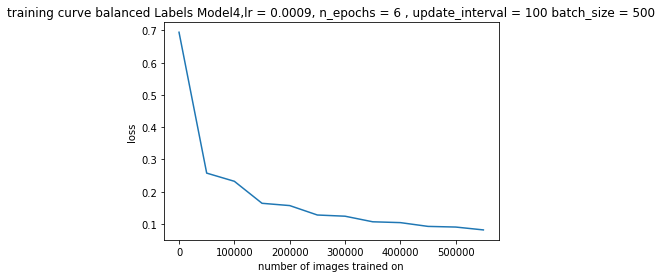

In [ ]:
#  Training Balanced Model4
balanced_trained_model4, balanced_losses4 = balanced_training('model4',balanced_model4, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval)
plt.plot(np.arange(len(balanced_losses4)) * batch_size * update_interval, balanced_losses4)
plt.title("training curve balanced Labels Model4,lr = {}, n_epochs = {} , update_interval = {} batch_size = {}".format(lr,n_epochs,update_interval,batch_size))
plt.xlabel("number of images trained on")
plt.ylabel("loss")
plt.show()

In [ ]:
# Testing Balanced Model4
test_acc, test_loss= balanced_testing('model4', balanced_trained_model4, loss_function, test_dataloader)
plt.savefig("Balanced Model4 Training Curve test_acc = {}, test_loss = {}.png".format(test_acc, test_loss))

100%|██████████| 20/20 [00:01<00:00, 19.04it/s]

test accuracy: 98.29
test loss: 0.05


<Figure size 432x288 with 0 Axes>

In [ ]:
#hyperparameter tuning model4
import math
def grid_search(model,input_shape,compression_size,test_data):
    e = math.e
    learning_rate = [0.0008,0.0007,0.0009,0.00095,0.001,0.00085,0.00075,0.0015,0.00092]
    n_epochs_lst = [3,5,6]
    loss_function = nn.CrossEntropyLoss()
    accuracy = float('-inf')
    best_lr = 0
    update_interval = 100
    best_batch = 500
    best_n_epochs = 0
    for lr in learning_rate:
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        for n_epochs in n_epochs_lst :
            train_dataset, train_dataloader = load_mnist(batch_size=batch_size, train=True)
            trained_model, losses = balanced_training('model2',model, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval)
            print(lr)
            print(n_epochs)
            test_loss, test_accuracy = balanced_testing('model2', trained_model, loss_function, test_dataloader)
            if test_accuracy >= accuracy:
                best_lr = lr
                best_n_epochs = n_epochs
                accuracy = test_accuracy

    return best_lr , best_n_epochs,test_accuracy

best_lr,best_batch_size, best_n_epochs,best_acc = grid_search(balanced_model4, 784, 2, test_dataset)


In [ ]:
"""def balanced_final_testing(train_dataloader, n_epochs, update_interval):
    acc = []
    part_loss = []
    num_correct = 0
    for n in range(n_epochs):
        for i, (image, label) in enumerate(tqdm(iter(train_dataloader))):
            # Hint: the above code essentially does one training step
            ##############################################################
            out1 = balanced_trained_model1(image)
            out2 = balanced_trained_model2(image)
            out3 = balanced_trained_model3(image)
            out4 = balanced_trained_model4(image)
            res = []
            for i in range(len(out1)):
                a = str(torch.argmax(out1[i]).numpy()) + str(torch.argmax(out2[i]).numpy()) + str(torch.argmax(out3[i]).numpy()) + str(torch.argmax(out4[i]).numpy())
                res.append(int(a))
            my_output = res
            new_label = torch.Tensor([int(mapping[int(l)]) for l in label]).long()
            num_correct = 0
            for index in range(len(new_label)):
                if my_output[index] == new_label[index] :
                    num_correct = num_correct + 1
            acc.append(num_correct/len(new_label))
            ##############################################################
    return acc"""


In [ ]:
def Combined_testing(train_dataloader, n_epochs, update_interval,Map,invMap):
    acc = []
    part_loss = []
    num_correct = 0
    y_test = []
    y_pred = []
    for n in range(n_epochs):
        for i, (image, label) in enumerate(tqdm(iter(train_dataloader))):
            # Hint: the above code essentially does one training step
            ##############################################################
            out1 = balanced_trained_model1(image)
            out2 = balanced_trained_model2(image)
            out3 = balanced_trained_model3(image)
            out4 = balanced_trained_model4(image)
            res = []
            a = ""
            for i in range(len(out1)):
                a = str(torch.argmax(out1[i]).numpy()) + str(torch.argmax(out2[i]).numpy()) + str(torch.argmax(out3[i]).numpy()) + str(torch.argmax(out4[i]).numpy())
                if a in invMap:
                    y_pred.append(invMap[a])

                else:
                    y_pred.append(-1)
                res.append(int(a))

            my_output = res
            for l in label:
                y_test.append(l.item())
            new_label = torch.Tensor([int(Map[int(l)]) for l in label]).long()
            num_correct = 0
            for index in range(len(new_label)):
                if my_output[index] == new_label[index] :
                    num_correct = num_correct + 1
            acc.append(num_correct/len(new_label))

    return acc,y_test,y_pred

100%|██████████| 120/120 [00:11<00:00, 10.52it/s]


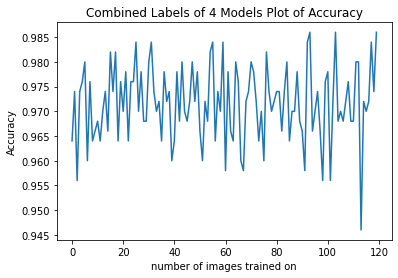

<Figure size 432x288 with 0 Axes>

In [ ]:
_, train_dataloader = load_mnist(batch_size=batch_size, train=True)
acc,y_test, y_pred = Combined_testing(train_dataloader, 1, 300,Map = balancedMap,invMap=  invBalancedMap)
plt.plot(acc)
plt.title("Combined Labels of 4 Models Plot of Accuracy")
plt.xlabel("number of images trained on")
plt.ylabel("Accuracy")
plt.show()
plt.savefig("Train Combined Model Accuracy Plot Balanced Labels.png")

In [ ]:
torch_acc = torch.tensor(acc)
print(torch_acc.mean())
# Final Accuracy of Combined Modules on Train Dataset

tensor(0.9717)


100%|██████████| 20/20 [00:01<00:00, 10.53it/s]


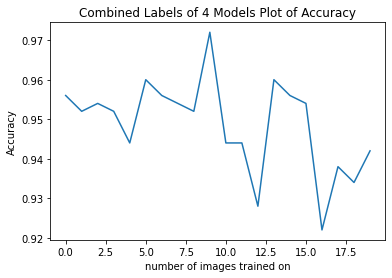

<Figure size 432x288 with 0 Axes>

In [ ]:
_, test_dataloader = load_mnist(batch_size=batch_size, train=False)
acc2,y_test2, y_pred2 = Combined_testing(test_dataloader, 1, 300,Map = balancedMap,invMap=  invBalancedMap)
plt.plot(acc2)
plt.title("Combined Labels of 4 Models Plot of Accuracy")
plt.xlabel("number of images trained on")
plt.ylabel("Accuracy")
plt.show()
plt.savefig("CNN Train Combined Model Accuracy Plot Balanced Labels.png")

In [ ]:
torch_acc = torch.tensor(acc2)
print(torch_acc.mean())

tensor(0.9487)


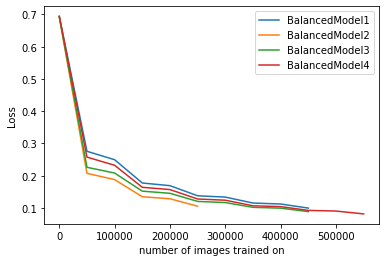

In [ ]:
# Plot Combined Training of all 4 Balanced models
# plot lines
# plt.sub
plt.plot(np.arange(len(balanced_losses1)) * batch_size * update_interval, balanced_losses1, label = 'BalancedModel1')
plt.plot(np.arange(len(balanced_losses2)) * batch_size * update_interval, balanced_losses2,label ='BalancedModel2')
plt.plot(np.arange(len(balanced_losses3)) * batch_size * update_interval, balanced_losses3,label = 'BalancedModel3')
plt.plot(np.arange(len(balanced_losses4)) * batch_size * update_interval, balanced_losses4,label = 'BalancedModel4')
plt.xlabel("number of images trained on")
plt.ylabel("Loss")
plt.legend()
plt.show()


60000


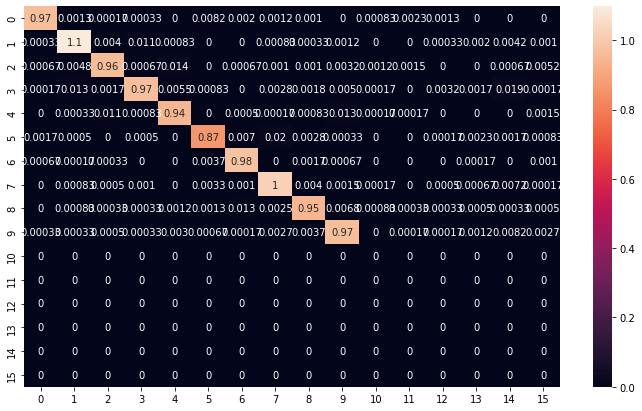

<Figure size 432x288 with 0 Axes>

In [ ]:
print(len(y_test))
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
classes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# conf_mat = confusion_matrix(y_test, y_pred)
cf_matrix = confusion_matrix(y_test, y_pred)
# sn.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt="d", cbar=False)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.show()
plt.savefig("Confusion Matrix on Balanced Dataset.jpg")